In [1]:
import pandas as pd
print(f"Pandas: {pd.__version__}")
import numpy as np
print(f"Numpy: {np.__version__}")

# Deep Learning 
import tensorflow as tf
print(f"Tensorflow: {tf.__version__}")
from tensorflow import keras
print(f"Keras: {keras.__version__}")
import sklearn
print(f"Sklearn: {sklearn.__version__}")

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

import collections
import yaml
import re
import os

# Preprocessing and Keras
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input

Pandas: 1.1.5
Numpy: 1.19.5
Tensorflow: 2.4.1
Keras: 2.4.0
Sklearn: 0.22.2.post1


In [11]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "" with length 9000bytes'.format(name = fn, length=len(uploaded[fn])))

Saving glove.6B.50d.txt to glove.6B.50d.txt
User uploaded file "" with length 9000bytes


In [3]:
import json
with open("intents.json") as file:
    data = json.load(file)
    print(data)

{'intents': [{'tag': 'greeting', 'patterns': ['Hi', 'How are you', 'Is anyone there', 'Hello', 'Good day', 'what up', 'How are you doing'], 'responses': ['Hello!', 'Good to see you again!', 'Hi there, how can I help?']}, {'tag': 'shop', 'patterns': ['I would like to buy something', 'whats on the shoe catalog', 'what do you recommend', 'could i get some cheap batteries', 'i would like order some titanium ore for solar cells'], 'responses': ['We have that in the catalogue', 'unfortunately, we currently do not have your item']}, {'tag': 'goodbye', 'patterns': ['cya', 'see you later', 'Goodbye', 'I am leaving', 'Have a good day'], 'responses': ['Sad to see you go', 'Goodbye', 'Talk to you later']}, {'tag': 'name', 'patterns': ['what is your name', 'what should I call you', 'what is your name'], 'responses': ['You can call me Ange', " I'm Ange", "I'm Ange aka sweet angel"]}, {'tag': 'negotiate', 'patterns': ['the price is too high', 'can you reduce the price', 'are there sales vailable', 'i

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import one_hot

# Label encoding the target
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# For the text data
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence

In [5]:
intents = data['intents']
train = []
for intent in intents:
    for pattern in intent['patterns']:
        train.append([intent['tag'], pattern.split(" ")])

In [6]:
df = pd.DataFrame(train, columns=['tag','pattern'])

In [7]:
X_train, X_val, y_train, y_val = train_test_split(df['pattern'], df['tag'], test_size = 0.3, 
                                                  shuffle = True, stratify = df['tag'], random_state = 7)

In [8]:
# Encoding the target variable

le = LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_val = le.transform(y_val)

In [9]:
t = Tokenizer()
t.fit_on_texts(X_train)

print("Document Count: \n{}\n".format(t.document_count))

def convert_to_padded(tokenizer, docs):
    ''' Taking in Keras API Tokenizer and documents and returns their padded version '''
    ## Using API's attributes
    # Embedding
    embedded = t.texts_to_sequences(docs)
    # Padding
    padded = pad_sequences(embedded, maxlen = 15, padding = 'post')
    return padded

## Defining useful variables for later
# Adding 1 becuase of reserved 0 index
vocab_size = len(t.word_counts) + 1
print(f'Vocab size:\n{vocab_size}')


padded_X_train = convert_to_padded(tokenizer = t, docs = X_train)
padded_X_val = convert_to_padded(tokenizer = t, docs = X_val)

print(f'padded_X_train\n{padded_X_train}')
print(f'padded_X_val\n{padded_X_val}')

Document Count: 
22

Vocab size:
69
padded_X_train
[[18 19  5 20 21  0  0  0  0  0  0  0  0  0  0]
 [ 1  6 22 23  0  0  0  0  0  0  0  0  0  0  0]
 [24  2 25  5  7  0  0  0  0  0  0  0  0  0  0]
 [26  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [27  8 28 29  9 10 30  7  9 31 32  0  0  0  0]
 [ 1  2 33 34 35  0  0  0  0  0  0  0  0  0  0]
 [11 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  6 13 36 37  0  0  0  0  0  0  0  0  0  0]
 [38  3 39 14 40 41  0  0  0  0  0  0  0  0  0]
 [ 4 42  3 43  2  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  8 45 46  0  0  0  0  0  0  0  0  0  0  0]
 [ 3 15 47  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  1  2 48  0  0  0  0  0  0  0  0  0  0  0]
 [ 3 49 50 51 14 52 53 17 54 55  0  0  0  0  0]
 [ 4 56  2 57  0  0  0  0  0  0  0  0  0  0  0]
 [58 10 11 12  0  0  0  0  0  0  0  0  0  0  0]
 [16  1  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  7  8 59 60  0  0  0  0  0  0  0  0  0  0]
 [ 4 61  0  0  0  0  0  0  0  0  0  0

In [12]:
# Using gloVe word embeddings
embeddings_index = {}
f = open('glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [13]:
# Initializing required objects
word_index = t.word_index
EMBEDDING_DIM = 50 # Because we are using the 50D gloVe embeddings

# Getting my embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [14]:
def make_model(vocab_size, max_token_length):
    ''' In this function I define all the layers of my neural network'''
    # Initialize
    model = Sequential()
    #model.add(Input(shape = (32,), dtype = 'int32'))

    # Adding layers - For embedding layer, I made sure to add my embedding matrix into the weights paramater
    model.add(Embedding(vocab_size, embedding_matrix.shape[1], input_length = 32, 
                        trainable = False, weights = [embedding_matrix]))
    
    model.add(Bidirectional(LSTM(128)))
#    model.add(LSTM(128)) 
    # Try 100
    model.add(Dense(600, activation = "relu",kernel_regularizer ='l2')) # Try 50, another dense layer? This takes a little bit of exploration
    
    # Adding another dense layer to increase model complexity
    model.add(Dense(600, activation = "relu",kernel_regularizer ='l2'))
    
    # Only update 50 percent of the nodes - helps with overfitting
    model.add(Dropout(0.5))
    
    # This last layer should be the size of the number of your intents!
    # Use sigmoid for multilabel classification, otherwise, use softmax!
    model.add(Dense(10, activation = "softmax"))
    
    return model

# Actually creating my model with 32 as the max token length
model = make_model(vocab_size, 32)
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 50)            3450      
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               183296    
_________________________________________________________________
dense (Dense)                (None, 600)               154200    
_________________________________________________________________
dense_1 (Dense)              (None, 600)               360600    
_________________________________________________________________
dropout (Dropout)            (None, 600)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                6010      
Total params: 707,556
Trainable params: 704,106
Non-trainable params: 3,450
______________________________________________

In [16]:
filename = 'models/intent_classification_b.h5'

# Learning rate scheduling
# This function keeps the initial learning rate for the first ten epochs  
# and decreases it exponentially after that.  
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_sched_checkpoint = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)


# This saves the best model
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

# The model you get at the end of it is after 100 epochs, but that might not have been
# the weights most associated with validation accuracy

# Only save the weights when you model has the lowest val loss. Early stopping

# Fitting model with all the callbacks above
hist = model.fit(padded_X_train, y_train, epochs = 50, batch_size = 32, 
                 validation_data = (padded_X_val, y_val), 
                 callbacks = [checkpoint, lr_sched_checkpoint, early_stopping])

Epoch 1/50
1/1 [==============================] - 0s 147ms/step - loss: 6.5696 - accuracy: 0.5909 - val_loss: 7.0382 - val_accuracy: 0.4000

Epoch 00001: val_loss improved from inf to 7.03821, saving model to models/intent_classification_b.h5
Epoch 2/50
1/1 [==============================] - 0s 96ms/step - loss: 6.4503 - accuracy: 0.7273 - val_loss: 6.9631 - val_accuracy: 0.4000

Epoch 00002: val_loss improved from 7.03821 to 6.96313, saving model to models/intent_classification_b.h5
Epoch 3/50
1/1 [==============================] - 0s 98ms/step - loss: 6.3839 - accuracy: 0.6364 - val_loss: 6.8924 - val_accuracy: 0.4000

Epoch 00003: val_loss improved from 6.96313 to 6.89238, saving model to models/intent_classification_b.h5
Epoch 4/50
1/1 [==============================] - 0s 95ms/step - loss: 6.2973 - accuracy: 0.6364 - val_loss: 6.8202 - val_accuracy: 0.4000

Epoch 00004: val_loss improved from 6.89238 to 6.82016, saving model to models/intent_classification_b.h5
Epoch 5/50
1/1 [===

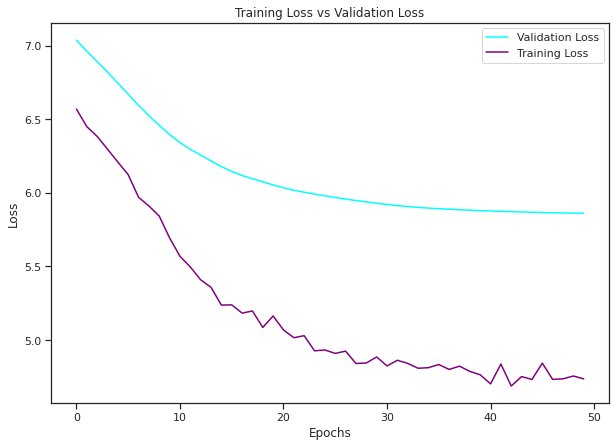

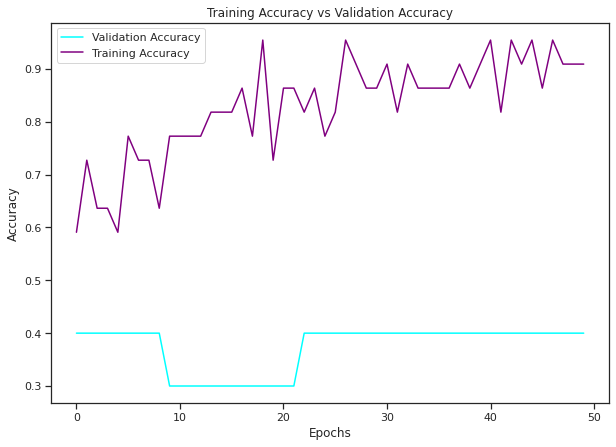

In [17]:
# Visualizing Training Loss vs Validation Loss (the loss is how wrong your model is)
plt.figure(figsize=(10,7))
plt.plot(hist.history['val_loss'], label = 'Validation Loss', color = 'cyan')
plt.plot(hist.history['loss'], label = 'Training Loss', color = 'purple')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualizing Testing Accuracy vs Validation Accuracy
plt.figure(figsize=(10,7))
plt.plot(hist.history['val_accuracy'], label = 'Validation Accuracy', color = 'cyan')
plt.plot(hist.history['accuracy'], label = 'Training Accuracy', color = 'purple')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# I have to redefine and load in the model saved by my model checkpoint 
from keras.models import load_model
model = load_model('models/intent_classification_b.h5')

In [19]:
def infer_intent(user_input):
    ''' Making a function that recieves a user input and outputs a 
    dictionary of predictions '''
    assert isinstance(user_input, str), 'User input must be a string!'
    user_input = [user_input]
    print(user_input)
    
    # Converting to Keras form
    padded_text = convert_to_padded(t, user_input)
    x = padded_text[0]
    
    # Prediction for each document
    probs = model.predict(padded_text)
#     print('Prob array shape', probs.shape)
    
    # Get the classes from label encoder
    classes = le.classes_
    
    # Getting predictions dict and sorting
    predictions = dict(zip(classes, probs[0]))
    sorted_predictions = {k: v for k, v in sorted(predictions.items(), key=lambda item: item[1], reverse = True)}
    
    return sorted_predictions

In [20]:
infer_intent('hi')

['hi']


{'alternatives': 0.096203476,
 'goodbye': 0.14456387,
 'greeting': 0.16225216,
 'name': 0.111570135,
 'negotiate': 0.09460515,
 'shop': 0.10240075}

In [21]:
infer_intent('are there any alternatives')

['are there any alternatives']


{'alternatives': 0.8124709,
 'goodbye': 0.027707579,
 'greeting': 0.05740085,
 'name': 0.012064704,
 'negotiate': 0.07953387,
 'shop': 0.009299456}

In [22]:
infer_intent("is theres sales on this item")

['is theres sales on this item']


{'alternatives': 0.011821298,
 'goodbye': 0.009117089,
 'greeting': 0.00087742676,
 'name': 0.0024038584,
 'negotiate': 0.9721265,
 'shop': 0.0034431776}